<a href="https://colab.research.google.com/github/RitulMohan/TF.Autoencoder/blob/main/kerasTUT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing all the neeeded libraraies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf


In [2]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
mnist = tf.keras.datasets.mnist


In [4]:
(x_train, y_train), (x_teset, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


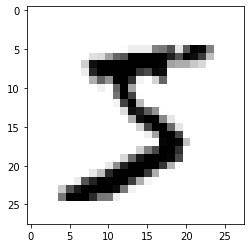

In [11]:
plt.imshow(x_train[0], cmap= plt.cm.binary)
plt.show()

In [6]:
print(x_train[0])
# pixels have values between 0 and 255

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [13]:
x_train = tf.keras.utils.normalize(x_train, axis= 1) 
#normalizes a numpy array, (L2 norm)

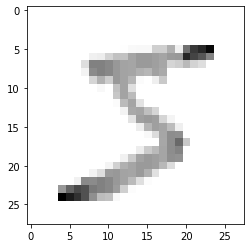

In [17]:
plt.imshow(x_train[0], cmap= plt.cm.binary)

In [18]:
print(x_train[0])
#as we can see the values have been normalised to fit between 0 and 1  
#this makes it easier for the model to learn

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [14]:
x_test = tf.keras.utils.normalize(x_train, axis= 1) 

# creating the model 

In [21]:
from tensorflow.python.ops.gen_nn_ops import softmax
from tensorflow.python.ops.gen_math_ops import sigmoid
from os import access
model = tf.keras.models.Sequential()

#creating our input layer
model.add(tf.keras.layers.Flatten())

#we'll be using the rectified linear function,the default activation function for 95%of the use cases
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))

model.add(tf.keras.layers.Dense(10, activation=softmax))
#done with the model, now lets compile it 
#models do not maximize the accuracy but instead minimize loss


model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])

In [22]:
model.fit(x_train,y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2622 - accuracy: 0.9235
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1068 - accuracy: 0.9672
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0720 - accuracy: 0.9774


In [24]:
model.save("keras_tutorial")
new_model= tf.keras.models.load_model('keras_tutorial')

INFO:tensorflow:Assets written to: keras_tutorial/assets


# Predicting

In [26]:
prediction = new_model.predict([x_test])
#takes in  input as a list

print(prediction)

[[6.08276485e-11 3.30842802e-08 2.14263469e-08 ... 5.66612570e-08
  2.96044023e-11 1.04181375e-08]
 [9.99971390e-01 2.10666670e-07 2.00720715e-05 ... 1.32177593e-06
  2.67774638e-08 6.17112221e-07]
 [1.74254638e-10 2.32246730e-05 1.94836116e-06 ... 4.52631612e-05
  2.36983709e-07 7.40488360e-07]
 ...
 [3.67781083e-11 2.27616523e-10 2.21139999e-11 ... 1.62108035e-10
  1.04926523e-09 2.52110681e-07]
 [2.26228876e-04 4.40297554e-05 5.00905560e-04 ... 2.79832398e-06
  1.78079543e-04 8.93110098e-07]
 [8.35009723e-06 2.89832180e-09 1.48310824e-06 ... 7.44313775e-06
  9.99845505e-01 7.19529635e-06]]


In [33]:
print(np.argmax(prediction[4]))

9


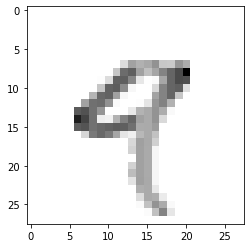

In [35]:
plt.imshow(x_test[4], cmap =plt.cm.binary)

here we have it, our first handwriting recognition deep model 